In [5]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier  #選擇鄰近點做鄰居綜合並做預測

iris = datasets.load_iris()
iris_X = iris.data                                  #iris的屬性
iris_y = iris.target                                #iris的分類

#print(iris_X[:2:])
#print(iris_y)

X_train, X_test, y_train, y_test = train_test_split(
    iris_X, iris_y, test_size=0.3
)                                                   #分離出tarin&test test size設為30%

#print(y_train)

knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
print(knn.predict(X_test))
print(y_test)

[2 2 2 2 1 2 2 1 1 2 0 1 1 1 1 1 0 0 1 1 1 1 1 0 2 0 0 0 2 1 1 0 0 2 2 1 0
 2 1 2 2 1 2 0 0]
[2 2 1 2 1 2 2 1 1 1 0 1 1 1 1 1 0 0 1 1 1 1 1 0 1 0 0 0 2 1 1 0 0 2 2 1 0
 2 2 2 2 1 2 0 0]


<function matplotlib.pyplot.show(close=None, block=None)>

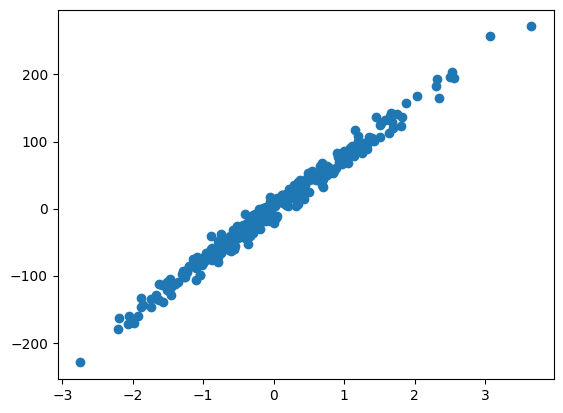

In [20]:
import numpy as np
from sklearn import datasets
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
##loaded_data = datasets.load_digits()
##data_X = loaded_data.data
##data_y = loaded_data.target

##model =  LinearRegression()
##model(data_X, data_y)

##print(model.predict(data_X[:4, :]))
##print(data_y[:4])

X,y = datasets.make_regression(n_samples=300, n_features=1, n_targets=1, noise=10)
plt.scatter(X,y)
plt.show

In [21]:
from sklearn import preprocessing
import numpy as np

a = np.array([[10, 2.7, 3.6],
              [-100, 5, -2],
              [120, 20, 40]],dtype=np.float64)

print(a)
print(preprocessing.scale(a))

[[  10.     2.7    3.6]
 [-100.     5.    -2. ]
 [ 120.    20.    40. ]]
[[ 0.         -0.85170713 -0.55138018]
 [-1.22474487 -0.55187146 -0.852133  ]
 [ 1.22474487  1.40357859  1.40351318]]


In [1]:
import tensorflow as tf
import timeit

with tf.device('/cpu:0'):
    cpu_a = tf.random.normal([10000, 1000])
    cpu_b = tf.random.normal([1000, 2000])
    print(cpu_a.device, cpu_b.device)
    
with tf.device('/gpu:0'):
    gpu_a = tf.random.normal([10000, 1000])
    gpu_b = tf.random.normal([1000, 2000])
    print(gpu_a.device, gpu_b.device)

def cpu_run():
    with tf.device('/cpu:0'):
        c = tf.matmul(cpu_a, cpu_b)
    return c

def gpu_run():
    with tf.device('/gpu:0'):
        c = tf.matmul(gpu_a, gpu_b)
    return c

cpu_time = timeit.timeit(cpu_run, number=10)
gpu_time = timeit.timeit(gpu_run, number=10)
print('warmup:', cpu_time, gpu_time)

cpu_time = timeit.timeit(cpu_run, number=10)
gpu_time = timeit.timeit(gpu_run, number=10)
print('real run time:', cpu_time, gpu_time)

/job:localhost/replica:0/task:0/device:CPU:0 /job:localhost/replica:0/task:0/device:CPU:0
/job:localhost/replica:0/task:0/device:GPU:0 /job:localhost/replica:0/task:0/device:GPU:0
warmup: 0.4804610999999994 1.1286801999999998
real run time: 0.4500503 0.0007581999999999312


In [2]:
import tensorflow as tf

x = tf.constant(1.)
a = tf.constant(2.)
b = tf.constant(3.)
c = tf.constant(4.)

with tf.GradientTape() as tape:
    tape.watch([a, b, c])
    y = a**2 * x + b * x + c


[dy_da, dy_db, dy_dc] = tape.gradient(y, [a, b, c])
print(dy_da, dy_db, dy_dc)


tf.Tensor(4.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32)


In [3]:
import numpy as np
#   y = wx + b
def compute_error_for_line_given_point(b, w, points):
    totalerror = 0
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        #   compute mse   
        totalerror += (y - (W * x + b)) ** 2
    #   avg loss for each point
    return totalerror / float(len(points))

def step_gradient(b_current, w_current, points, learningRate):
    b_current = 0
    w_current = 0
    N = float(len(points))
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        
        b_gradient += (2/N) * ((w_current * x + b_current) - y)
        
        w_gradient += (2/N) * x * ((w_current * x + b_current) - y)
    
    new_b = b_current - (learningRate * b_gradient)
    new_w = w_current - (learningRate * w_gradient)

    return [new_b, new_w]

def gradient_descent_runner(points, starting_b, starting_w, learing_rate, num_iterations):
    b = starting_b
    w = starting_w
    
    for i in range(num_iterations):
        b, w = step_gradient(b, w, np.array(points), learing_rate)
    
    return [b,w]
    

In [4]:
import tensorflow as tf 
import numpy as np

(x, y), (X_test,y_test) = tf.keras.datasets.mnist.load_data()
print(x.shape)
print(y.shape)
print(x.min(),x.max(),x.mean())


(60000, 28, 28)
(60000,)
0 255 33.318421449829934


In [5]:
import tensorflow as tf 
import numpy as np

(x, y), (X_test,y_test) = tf.keras.datasets.mnist.load_data()
print(X_test.shape)
print(y_test.shape)

(10000, 28, 28)
(10000,)


In [7]:
y[:4]

array([5, 0, 4, 1], dtype=uint8)

In [9]:
y_onehot = tf.one_hot(y,depth= 10)
print(y_onehot[:2])

tf.Tensor(
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]], shape=(2, 10), dtype=float32)


In [12]:
import tensorflow as tf 
import numpy as np

(x, y), (X_test,y_test) = tf.keras.datasets.cifar10.load_data()
print(x.shape)
print(y.shape)
print(x.min(),x.max(),x.mean())
print(X_test.shape)
print(y_test.shape)
y[:4]

(50000, 32, 32, 3)
(50000, 1)
0 255 120.70756512369792
(10000, 32, 32, 3)
(10000, 1)


array([[6],
       [9],
       [9],
       [4]], dtype=uint8)